In [1]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [2]:
!unzip '/content/drive/MyDrive/DATASET/cnp (1).zip'

Archive:  /content/drive/MyDrive/DATASET/cnp (1).zip
   creating: cnp/Data/
   creating: cnp/Data/test/
   creating: cnp/Data/test/COVID19/
  inflating: cnp/Data/test/COVID19/COVID19(460).jpg  
  inflating: cnp/Data/test/COVID19/COVID19(461).jpg  
  inflating: cnp/Data/test/COVID19/COVID19(462).jpg  
  inflating: cnp/Data/test/COVID19/COVID19(463).jpg  
  inflating: cnp/Data/test/COVID19/COVID19(464).jpg  
  inflating: cnp/Data/test/COVID19/COVID19(465).jpg  
  inflating: cnp/Data/test/COVID19/COVID19(466).jpg  
  inflating: cnp/Data/test/COVID19/COVID19(467).jpg  
  inflating: cnp/Data/test/COVID19/COVID19(468).jpg  
  inflating: cnp/Data/test/COVID19/COVID19(469).jpg  
  inflating: cnp/Data/test/COVID19/COVID19(470).jpg  
  inflating: cnp/Data/test/COVID19/COVID19(471).jpg  
  inflating: cnp/Data/test/COVID19/COVID19(472).jpg  
  inflating: cnp/Data/test/COVID19/COVID19(473).jpg  
  inflating: cnp/Data/test/COVID19/COVID19(474).jpg  
  inflating: cnp/Data/test/COVID19/COVID19(475).jp

In [3]:
path='/content/cnp/Data'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

train_dir='/content/cnp/Data/train'
test_dir='/content/cnp/Data/test'



/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


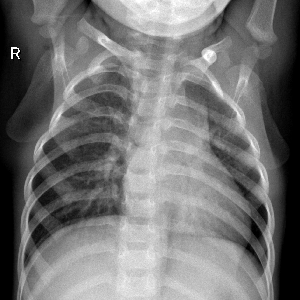

In [5]:
tf.keras.preprocessing.image.load_img('/content/cnp/Data/test/NORMAL/NORMAL(1268).jpg',grayscale=True,color_mode="grayscale",target_size=(300,300),interpolation="nearest")

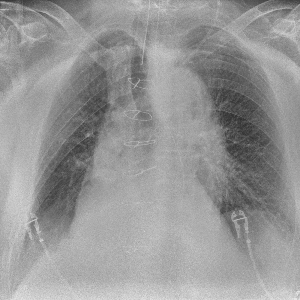

In [6]:
tf.keras.preprocessing.image.load_img('/content/cnp/Data/test/COVID19/COVID19(464).jpg',grayscale=True,color_mode="grayscale",target_size=(300,300),interpolation="nearest")

In [7]:
train_datagen=ImageDataGenerator(rescale=1.0/255,
                                 shear_range=0.1,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
training_set=train_datagen.flow_from_directory(train_dir,
                                               target_size=(1000,1000),
                                               batch_size=32,
                                               color_mode='grayscale',
                                               class_mode='binary')

Found 1726 images belonging to 2 classes.


In [8]:
test_datagen=ImageDataGenerator(rescale=1.0/255)
test_set=train_datagen.flow_from_directory(test_dir,
                                               target_size=(1000,1000),
                                               batch_size=32,
                                               color_mode='grayscale',
                                               class_mode='binary')

Found 433 images belonging to 2 classes.


In [9]:
#Initializing CNN

cnn=tf.keras.models.Sequential()

#---------------------------1st Layer----------------------#
#convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=5,activation='relu',input_shape=[1000,1000,1]))

#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=5,strides=5))

#---------------------------2nd Layer----------------------#
#convolution
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=5,activation='relu'))

#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=5,strides=5))

#---------------------------3rd Layer----------------------#
#convolution
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=5,activation='relu'))

#pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=5,strides=5))

#Flattening
cnn.add(tf.keras.layers.Flatten())

#Hidden Layers
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
#Output Layer
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 996, 996, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 199, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 195, 195, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 39, 39, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 35, 35, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 128)        0

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
callbacks=EarlyStopping(
    monitor="val_accuracy",
    patience=3,
    verbose=1,
    mode="min",
    restore_best_weights=False
)

In [11]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
output=cnn.fit(x=training_set,validation_data=test_set,epochs=9,callbacks=callbacks)

Epoch 1/9
54/54 [==============================] - 1861s 34s/step - loss: 0.4056 - accuracy: 0.8204 - val_loss: 0.1798 - val_accuracy: 0.9376
Epoch 2/9
54/54 [==============================] - 1869s 35s/step - loss: 0.1620 - accuracy: 0.9380 - val_loss: 0.1973 - val_accuracy: 0.9376
Epoch 3/9
54/54 [==============================] - 1899s 35s/step - loss: 0.1272 - accuracy: 0.9560 - val_loss: 0.1041 - val_accuracy: 0.9723
Epoch 4/9
54/54 [==============================] - 1860s 34s/step - loss: 0.0907 - accuracy: 0.9693 - val_loss: 0.0845 - val_accuracy: 0.9746
Epoch 4: early stopping


In [12]:
training_set.class_indices

{'COVID19': 0, 'NORMAL': 1}

14/14 - 151s - loss: 0.1005 - accuracy: 0.9630 - 151s/epoch - 11s/step


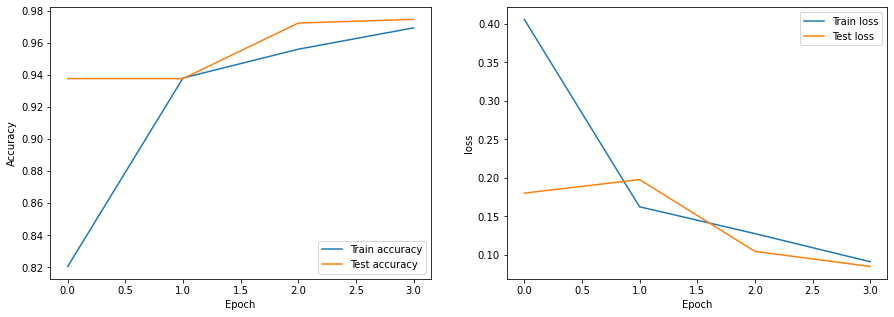

In [13]:
plt.figure(figsize=(15,5))


plt.subplot(1,2,1)
plt.plot(output.history['accuracy'],label='accuracy')
plt.plot(output.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train accuracy','Test accuracy'],loc='lower right')

plt.subplot(1,2,2)
plt.plot(output.history['loss'],label='loss')
plt.plot(output.history['val_loss'],label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['Train loss','Test loss'],loc='upper right')

test_loss,test_acc=cnn.evaluate(test_set,verbose=2)


In [16]:
image=tf.keras.preprocessing.image.load_img('/content/cnp/Data/test/COVID19/COVID19(468).jpg',target_size=(1000,1000),grayscale=True,color_mode='grayscale')
input_arr=tf.keras.preprocessing.image.img_to_array(image)
input_arr=np.array([input_arr])
if cnn.predict(input_arr)==1:
  print("Negative ----- Normal")
else:
  print("Positive ----- Covid")

Positive ----- Covid
